## Прогнозирование с помощью нейронных сетей

In [1]:
import numpy
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
sales = pd.read_csv('monthly-car-sales-in-quebec-1960.csv', sep=';',index_col="Month", parse_dates=True)
sales.head()

,Monthly car sales in Quebec 1960-1968
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


<AxesSubplot:xlabel='Month'>

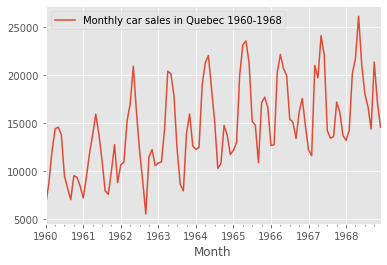

In [3]:
sales.plot()

In [4]:
data = sales['Monthly car sales in Quebec 1960-1968'].values

In [5]:
sales_2 = pd.DataFrame()

for i in range(12,0,-1):
    sales_2['t-'+str(i)] = sales['Monthly car sales in Quebec 1960-1968'].shift(i)

sales_2['t'] = sales['Monthly car sales in Quebec 1960-1968'].values

In [6]:
sales_4 = sales_2[12:]
sales_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
Month,,,,,,,,,,,,,
1961-01-01,6550.0,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237
1961-02-01,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374
1961-03-01,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837
1961-04-01,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784
1961-05-01,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926


In [7]:
#  предикторы и отклик разделяем
# Отклик - группирующая переменная -  вектор y
y = sales_4['t']
# Предикторы - таблица X
X = sales_4.drop('t', axis=1)

In [8]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:91]
y_train = y[:91]
X_test  = X[91:]
y_test  = y[91:]

In [9]:
X_train.head(5)

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
Month,,,,,,,,,,,,
1961-01-01,6550.0,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0
1961-02-01,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0
1961-03-01,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0
1961-04-01,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0
1961-05-01,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0


In [10]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
#  Обучение нейронной сети 

# Creating a model
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])


# Training a model
model.fit(X_train, y_train, epochs=300, batch_size=None)



Epoch 1/300
3/3 [==============================] - 0s 887us/step - loss: 45977848.0000 - mean_absolute_percentage_error: 36.6380
Epoch 2/300
3/3 [==============================] - 0s 973us/step - loss: 40284440.0000 - mean_absolute_percentage_error: 34.3213
Epoch 3/300
3/3 [==============================] - 0s 1ms/step - loss: 35926352.0000 - mean_absolute_percentage_error: 32.9975
Epoch 4/300
3/3 [==============================] - 0s 1ms/step - loss: 34565596.0000 - mean_absolute_percentage_error: 33.6736
Epoch 5/300
3/3 [==============================] - 0s 6ms/step - loss: 33245446.0000 - mean_absolute_percentage_error: 33.6412
Epoch 6/300
3/3 [==============================] - 0s 6ms/step - loss: 32973830.0000 - mean_absolute_percentage_error: 33.9781
Epoch 7/300
3/3 [==============================] - 0s 1ms/step - loss: 32542590.0000 - mean_absolute_percentage_error: 34.0578
Epoch 8/300
3/3 [==============================] - 0s 3ms/step - loss: 31730890.0000 - mean_absolute_percen

3/3 [==============================] - 0s 7ms/step - loss: 8237347.0000 - mean_absolute_percentage_error: 16.7261
Epoch 66/300
3/3 [==============================] - 0s 1ms/step - loss: 8083466.0000 - mean_absolute_percentage_error: 16.5272
Epoch 67/300
3/3 [==============================] - 0s 2ms/step - loss: 7946703.0000 - mean_absolute_percentage_error: 16.3580
Epoch 68/300
3/3 [==============================] - 0s 2ms/step - loss: 7812763.5000 - mean_absolute_percentage_error: 16.1810
Epoch 69/300
3/3 [==============================] - 0s 1ms/step - loss: 7672383.5000 - mean_absolute_percentage_error: 16.0057
Epoch 70/300
3/3 [==============================] - 0s 1ms/step - loss: 7535118.0000 - mean_absolute_percentage_error: 15.8897
Epoch 71/300
3/3 [==============================] - 0s 2ms/step - loss: 7437059.0000 - mean_absolute_percentage_error: 15.7790
Epoch 72/300
3/3 [==============================] - 0s 1ms/step - loss: 7293461.0000 - mean_absolute_percentage_error: 15.60

3/3 [==============================] - 0s 2ms/step - loss: 3844914.7500 - mean_absolute_percentage_error: 10.9617
Epoch 130/300
3/3 [==============================] - 0s 3ms/step - loss: 3824506.0000 - mean_absolute_percentage_error: 10.9115
Epoch 131/300
3/3 [==============================] - 0s 4ms/step - loss: 3802347.5000 - mean_absolute_percentage_error: 10.8935
Epoch 132/300
3/3 [==============================] - 0s 3ms/step - loss: 3786423.5000 - mean_absolute_percentage_error: 10.8649
Epoch 133/300
3/3 [==============================] - 0s 4ms/step - loss: 3757257.7500 - mean_absolute_percentage_error: 10.8227
Epoch 134/300
3/3 [==============================] - 0s 11ms/step - loss: 3737960.7500 - mean_absolute_percentage_error: 10.8158
Epoch 135/300
3/3 [==============================] - 0s 10ms/step - loss: 3720129.0000 - mean_absolute_percentage_error: 10.8022
Epoch 136/300
3/3 [==============================] - 0s 3ms/step - loss: 3705845.5000 - mean_absolute_percentage_err

3/3 [==============================] - 0s 2ms/step - loss: 3166049.5000 - mean_absolute_percentage_error: 9.8292
Epoch 194/300
3/3 [==============================] - 0s 2ms/step - loss: 3166592.0000 - mean_absolute_percentage_error: 9.8491
Epoch 195/300
3/3 [==============================] - 0s 3ms/step - loss: 3162354.0000 - mean_absolute_percentage_error: 9.8381
Epoch 196/300
3/3 [==============================] - 0s 3ms/step - loss: 3154213.0000 - mean_absolute_percentage_error: 9.7928
Epoch 197/300
3/3 [==============================] - 0s 3ms/step - loss: 3149547.5000 - mean_absolute_percentage_error: 9.7809
Epoch 198/300
3/3 [==============================] - 0s 2ms/step - loss: 3154380.0000 - mean_absolute_percentage_error: 9.7976
Epoch 199/300
3/3 [==============================] - 0s 3ms/step - loss: 3145840.5000 - mean_absolute_percentage_error: 9.7822
Epoch 200/300
3/3 [==============================] - 0s 2ms/step - loss: 3136212.5000 - mean_absolute_percentage_error: 9.742

3/3 [==============================] - 0s 2ms/step - loss: 2929360.5000 - mean_absolute_percentage_error: 9.3382
Epoch 258/300
3/3 [==============================] - 0s 2ms/step - loss: 2935935.0000 - mean_absolute_percentage_error: 9.3433
Epoch 259/300
3/3 [==============================] - 0s 1ms/step - loss: 2913526.7500 - mean_absolute_percentage_error: 9.3021
Epoch 260/300
3/3 [==============================] - 0s 1ms/step - loss: 2905596.7500 - mean_absolute_percentage_error: 9.3396
Epoch 261/300
3/3 [==============================] - 0s 3ms/step - loss: 2922395.5000 - mean_absolute_percentage_error: 9.4018
Epoch 262/300
3/3 [==============================] - 0s 3ms/step - loss: 2923612.7500 - mean_absolute_percentage_error: 9.4227
Epoch 263/300
3/3 [==============================] - 0s 2ms/step - loss: 2911349.0000 - mean_absolute_percentage_error: 9.3612
Epoch 264/300
3/3 [==============================] - 0s 2ms/step - loss: 2892807.7500 - mean_absolute_percentage_error: 9.302

In [13]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

1/1 [==============================] - 0s 820us/step - loss: 5185629.0000 - mean_absolute_percentage_error: 9.6112

MAPE: 9.61%


In [14]:
# Вычисляем прогноз
predictions = model.predict(X_test)

In [15]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

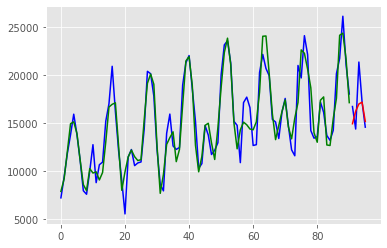

In [16]:
x2 = numpy.arange(0, 91, 1)
x3 = numpy.arange(91, 96, 1)

plt.plot(x2, y_train, color='blue')
plt.plot(x2, predictions_train, color='green')
plt.plot(x3, y_test, color='blue')
plt.plot(x3, predictions, color='red')